In [1]:
#Missing Data
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Age': [25, 30, None, 22, 28],
        'Salary': [50000, 60000, 75000, None, 55000]}

df = pd.DataFrame(data)


print("Original DataFrame:")
print(df)

df_cleaned = df.dropna()

print("\nDataFrame after removing missing values:")
print(df_cleaned)

mean_age = df['Age'].mean()
mean_salary = df['Salary'].mean()

df_filled = df.fillna({'Age': mean_age, 'Salary': mean_salary})

print("\nDataFrame after filling missing values:")
print(df_filled)


Original DataFrame:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  30.0  60000.0
2  Charlie   NaN  75000.0
3    David  22.0      NaN
4      Eve  28.0  55000.0

DataFrame after removing missing values:
    Name   Age   Salary
0  Alice  25.0  50000.0
1    Bob  30.0  60000.0
4    Eve  28.0  55000.0

DataFrame after filling missing values:
      Name    Age   Salary
0    Alice  25.00  50000.0
1      Bob  30.00  60000.0
2  Charlie  26.25  75000.0
3    David  22.00  60000.0
4      Eve  28.00  55000.0


In [2]:
#Categorical Data
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
        'City': ['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Boston']}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Handling categorical data: One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'City'])

# Display the DataFrame after one-hot encoding
print("\nDataFrame after one-hot encoding:")
print(df_encoded)


Original DataFrame:
      Name  Gender           City
0    Alice  Female       New York
1      Bob    Male    Los Angeles
2  Charlie    Male        Chicago
3    David    Male  San Francisco
4      Eve  Female         Boston

DataFrame after one-hot encoding:
      Name  Gender_Female  Gender_Male  City_Boston  City_Chicago  \
0    Alice              1            0            0             0   
1      Bob              0            1            0             0   
2  Charlie              0            1            0             1   
3    David              0            1            0             0   
4      Eve              1            0            1             0   

   City_Los Angeles  City_New York  City_San Francisco  
0                 0              1                   0  
1                 1              0                   0  
2                 0              0                   0  
3                 0              0                   1  
4                 0              0       

In [1]:
# Data Discretization
import pandas as pd

data = {'Temperature': [22, 30, 18, 25, 15, 28, 35, 20]}
df = pd.DataFrame(data)

# Equal width discretization
df['Temperature_Category'] = pd.cut(df['Temperature'], bins=3, labels=['Low', 'Medium', 'High'])

print(df)


   Temperature Temperature_Category
0           22               Medium
1           30                 High
2           18                  Low
3           25               Medium
4           15                  Low
5           28               Medium
6           35                 High
7           20                  Low


In [3]:
#Data Inconsistency
import pandas as pd

# Sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Salary': [60000, None, 75000, -10000, 55000]}

df = pd.DataFrame(data)

# Data cleaning tasks
# Fill in missing values with the median
df['Salary'].fillna(df['Salary'].median(), inplace=True)

# Remove outliers (assuming salary can't be negative)
df = df[df['Salary'] > 0]

# Correct inconsistency (assuming negative salary is an error)
df['Salary'] = df['Salary'].apply(lambda x: abs(x))

print(df)


      Name   Salary
0    Alice  60000.0
1      Bob  57500.0
2  Charlie  75000.0
4      Eve  55000.0


In [3]:
#Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Build and train a classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8909090909090909


In [4]:
#Parameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a machine learning model (Random Forest in this case)
classifier = RandomForestClassifier()

# Define a parameter grid for tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Create a GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy')

# Use the training set for training and the validation set for parameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the final model with the best parameters on the combined training and validation sets
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred = final_model.predict(X_test)tgoo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")


Accuracy on the test set: 0.89


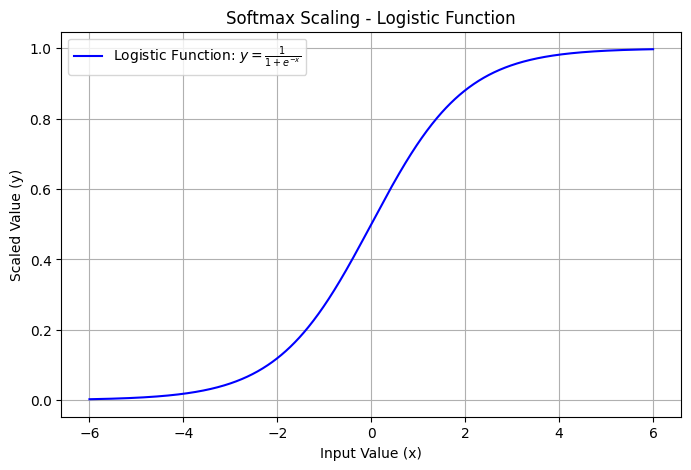

In [1]:
#Softmax Scaling
import numpy as np
import matplotlib.pyplot as plt

# Original values
x_values = np.linspace(-6, 6, 1000)

# Logistic function
logistic_function = 1 / (1 + np.exp(-x_values))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x_values, logistic_function, label='Logistic Function: $y = \\frac{1}{1 + e^{-x}}$', color='blue')
plt.xlabel('Input Value (x)')
plt.ylabel('Scaled Value (y)')
plt.title('Softmax Scaling - Logistic Function')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-5-21e3b845b751>:10: RuntimeWarning: invalid value encountered in log
  log_brain_weights = np.log(brain_weights)


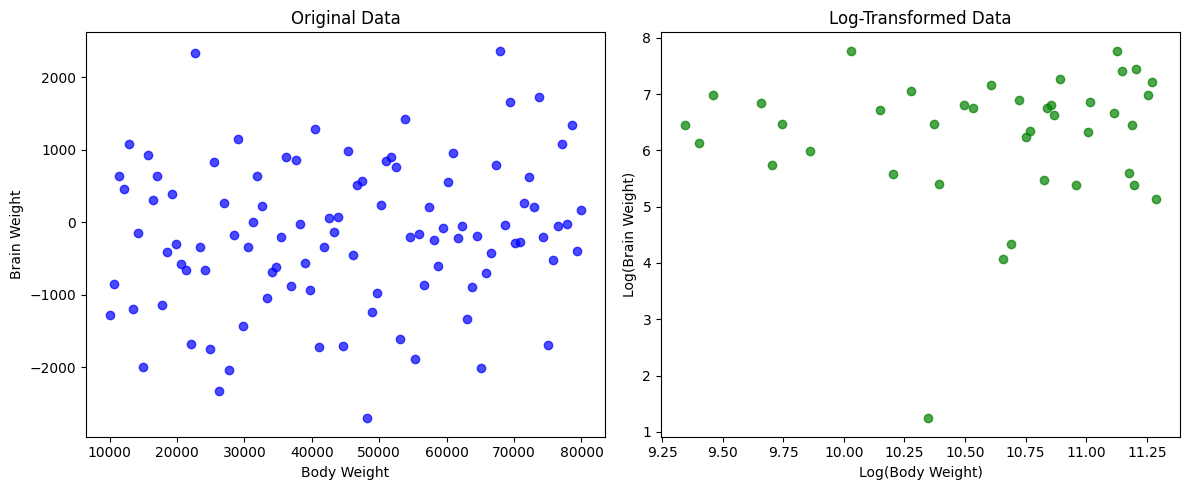

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
body_weights = np.linspace(10000, 80000, 100)
brain_weights = 0.001 * body_weights + np.random.normal(0, 1000, 100)

# Log transformation
log_body_weights = np.log(body_weights)
log_brain_weights = np.log(brain_weights)

# Plot original and log-transformed data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(body_weights, brain_weights, marker='o', color='blue', alpha=0.7)
plt.title('Original Data')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')

plt.subplot(1, 2, 2)
plt.scatter(log_body_weights, log_brain_weights, marker='o', color='green', alpha=0.7)
plt.title('Log-Transformed Data')
plt.xlabel('Log(Body Weight)')
plt.ylabel('Log(Brain Weight)')

plt.tight_layout()
plt.show()
